<a href="https://colab.research.google.com/github/SowjanyaSadashivu/Projects/blob/main/covid_detection_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io 
import os
import random
import numpy as np
import pandas as pd
import shutil
import torch
import torchvision
import keras
import seaborn as sns
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from torchvision.utils import make_grid
from keras.preprocessing.image import ImageDataGenerator
from zipfile import ZipFile
from google.colab import files
from google.colab import drive
from sklearn.metrics import confusion_matrix


In [ ]:
!wget https://www.dropbox.com/s/nbwhrahfe0pdthd/Covid_dataset.zip?dl=0

--2021-05-04 22:19:54--  https://www.dropbox.com/s/nbwhrahfe0pdthd/Covid_dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nbwhrahfe0pdthd/Covid_dataset.zip [following]
--2021-05-04 22:19:55--  https://www.dropbox.com/s/raw/nbwhrahfe0pdthd/Covid_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4c94f3427068906c5dd82e0708.dl.dropboxusercontent.com/cd/0/inline/BN5SKfNQhwR---UrXrho0I2c6Qbyab2SRKSIfHnaFOYoCRyoXzfgXUaXlND0EhGc3Argspzmw3-GT4ZDQnojD9qTnA11kY9OTa7jN1oGii0NY2KUKGifwRGPGL9ZvW1KO19e7fsmgyQeqCsRwTzgi2cy/file# [following]
--2021-05-04 22:19:55--  https://uc4c94f3427068906c5dd82e0708.dl.dropboxusercontent.com/cd/0/inline/BN5SKfNQhwR---UrXrho0I2c6Qbyab2SRKSIfHnaFOYoCRyoXzfgXUaXlND0EhGc3Argsp

In [ ]:
!unzip Covid_dataset.zip\?dl\=0

In [ ]:
train_path = '/content/Covid_dataset/train'
val_path = '/content/Covid_dataset/val'

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (224,224,3)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy, optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 54, 54, 64)       

In [ ]:
train_images = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_images = image.ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train_image_dataset = train_images.flow_from_directory(
    '/content/drive/MyDrive/Datasets/Covid_datasets/train',
    target_size = (224, 224),
    batch_size = 25,
    class_mode = 'binary'    
)

In [ ]:
test_images_dataset = test_images.flow_from_directory(
    '/content/drive/MyDrive/Datasets/Covid_datasets/val',
     target_size = (224, 224),
     batch_size = 25,
     class_mode = 'binary' 
)

In [ ]:
hist = model.fit_generator(
    train_image_dataset,
    steps_per_epoch = 5,
    epochs = 15,
    validation_data = test_images_dataset,
    validation_steps = 3
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
5/5 [==============================] - 82s 11s/step - loss: 0.9853 - accuracy: 0.4608 - val_loss: 0.6933 - val_accuracy: 0.5067
Epoch 2/15
5/5 [==============================] - 21s 4s/step - loss: 0.6947 - accuracy: 0.5033 - val_loss: 0.6919 - val_accuracy: 0.5067
Epoch 3/15
5/5 [==============================] - 11s 2s/step - loss: 0.6871 - accuracy: 0.6044 - val_loss: 0.6886 - val_accuracy: 0.4933
Epoch 4/15
5/5 [==============================] - 12s 2s/step - loss: 0.6817 - accuracy: 0.5474 - val_loss: 0.6699 - val_accuracy: 0.9333
Epoch 5/15
5/5 [==============================] - 10s 2s/step - loss: 0.6446 - accuracy: 0.6678 - val_loss: 0.5725 - val_accuracy: 0.9467
Epoch 6/15
5/5 [==============================] - 7s 1s/step - loss: 0.5011 - accuracy: 0.7567 - val_loss: 0.2873 - val_accuracy: 0.9733
Epoch 7/15
5/5 [==============================] - 6s 1s/step - loss: 0.3869 - accuracy: 0.8322 - val_loss: 0.3431 - val_accuracy: 0.8133
Epoch 8/15
5/5 [===================

In [ ]:
model.save('Covid_cnn_model')

INFO:tensorflow:Assets written to: Covid_cnn_model/assets


In [ ]:
Model = load_model('/content/Covid_cnn_model')

In [ ]:
train_image_result = Model.evaluate_generator(train_image_dataset)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
print("The Loss on the train image set is: {:.3f}".format(train_image_result[0]))
print("The accuracy on the train image set is: {:.1f}%".format(train_image_result[1]*100))

The Loss on the train image set is: 0.179
The accuracy on the train image set is: 95.2%


In [ ]:
Model.evaluate(train_image_dataset)

13/13 [==============================] - 10s 777ms/step - loss: 0.1747 - accuracy: 0.9423


[0.17471933364868164, 0.942307710647583]

In [ ]:
Model.evaluate_generator(test_images_dataset)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.13388898968696594, 0.9624999761581421]

In [ ]:
test_image_result = Model.evaluate(test_images_dataset)

4/4 [==============================] - 2s 448ms/step - loss: 0.1339 - accuracy: 0.9625


In [ ]:
test_image_result

[0.13388900458812714, 0.9624999761581421]

In [ ]:
print("The Loss on the test image set is: {:.3f}".format(test_image_result[0]))
print("The accuracy on the test image set is: {:.1f}%".format(test_image_result[1]*100))

The Loss on the test image set is: 0.134
The accuracy on the test image set is: 96.2%


In [ ]:
def get_default_device():
   
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
y_actual_data = []
y_test_data = []

In [ ]:
os.listdir('/content/Covid_dataset/val/Normal')

In [ ]:
print(type(os.listdir('/content/Covid_dataset/val/Normal')))

<class 'list'>


In [ ]:
len(os.listdir('/content/Covid_dataset/val/Normal'))

In [ ]:
normal_val_images = []
for files in os.listdir('/content/Covid_dataset/val/Normal'):
  if files.endswith("jpeg"):
    normal_val_images.append(files)

In [ ]:
len(normal_val_images)

In [ ]:
for i in range(40):
  img = image.load_img('/content/Covid_dataset/val/Normal/' + normal_val_images[i], target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  prediction = model.predict_classes(img)
  y_test_data.append(prediction[0,0])
  y_actual_data.append(1)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
covid_val_images = []
for files in os.listdir('/content/Covid_dataset/val/Covid_19'):
  if files.endswith("jpeg"):
    covid_val_images.append(files)

In [ ]:
len(covid_val_images)

In [ ]:
for i in range(17):
  img = image.load_img('/content/Covid_dataset/val/Covid_19/' + covid_val_images[i], target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)
  prediction = model.predict_classes(img)
  y_test_data.append(prediction[0,0])
  y_actual_data.append(1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


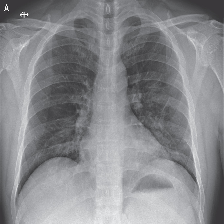

In [ ]:
 image.load_img('/content/Covid_dataset/val/Covid_19/' + covid_val_images[2], target_size=(224,224))

In [ ]:
loss , accuracy = model.evaluate(test_images_dataset)
print(f'Test Loss: {loss:.4}')
print(f'Test ACC: {accuracy:.2%}')

4/4 [==============================] - 2s 387ms/step - loss: 0.1339 - accuracy: 0.9625
Test Loss: 0.1339
Test ACC: 96.25%


In [ ]:
dict_classes = train_image_dataset.class_indices
dict_classes

{'Covid_19': 0, 'Normal': 1}

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor ='val_loss', verbose = 0,
                             save_best_only = True,
                             mode = 'auto')

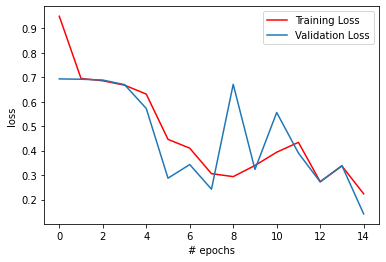

In [ ]:
from matplotlib import pyplot as plt
plt.plot(hist.history['loss'], 'r',label = 'Training Loss')
plt.plot(hist.history['val_loss'],label = 'Validation Loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

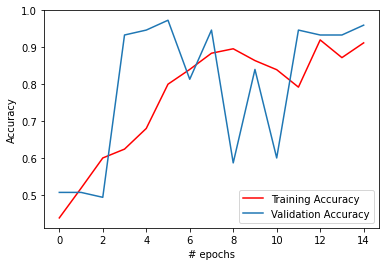

In [ ]:
plt.plot(hist.history['accuracy'], 'r',label = 'Training Accuracy')
plt.plot(hist.history['val_accuracy'],label = 'Validation Accuracy')
plt.xlabel('# epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()